‚úÖ Loaded 196 rows


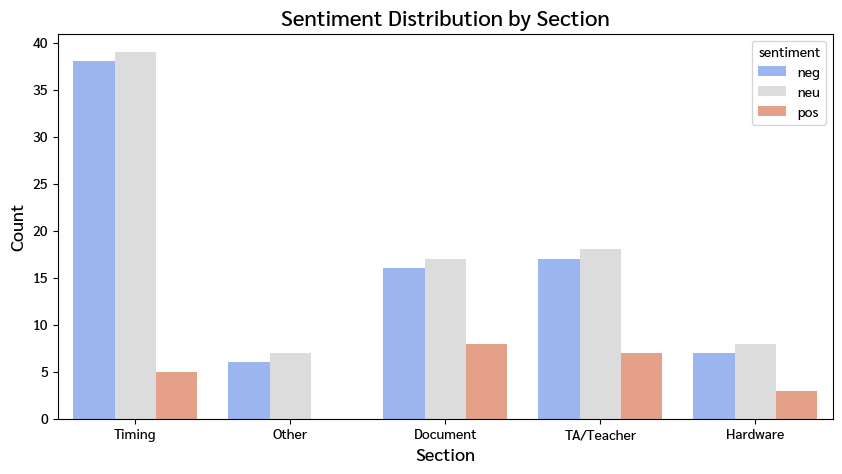

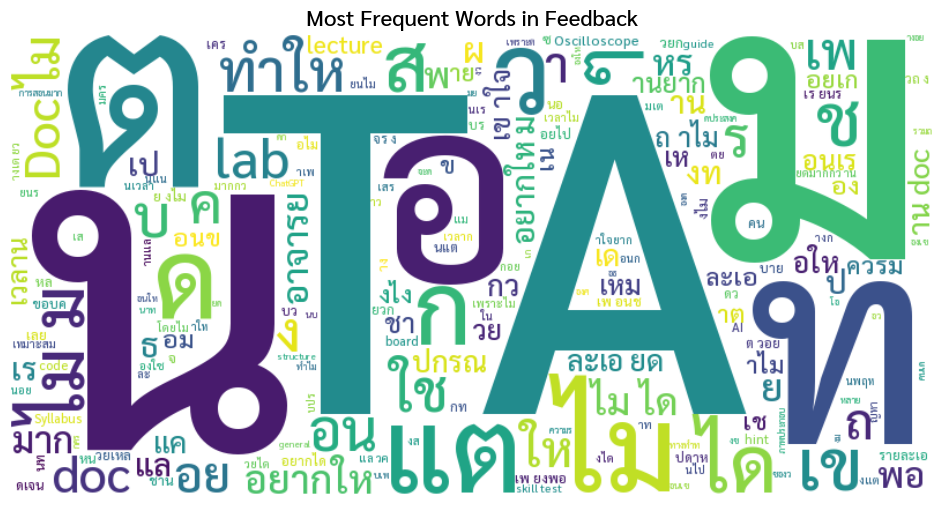

‚úÖ Exported sentiment data to ../data/processed/feedback_sentiment.csv

üìä Summary of average sentiment:
      section  sentiment_score
0    Document        -0.195122
1    Hardware        -0.222222
3  TA/Teacher        -0.238095
4      Timing        -0.402439
2       Other        -0.461538


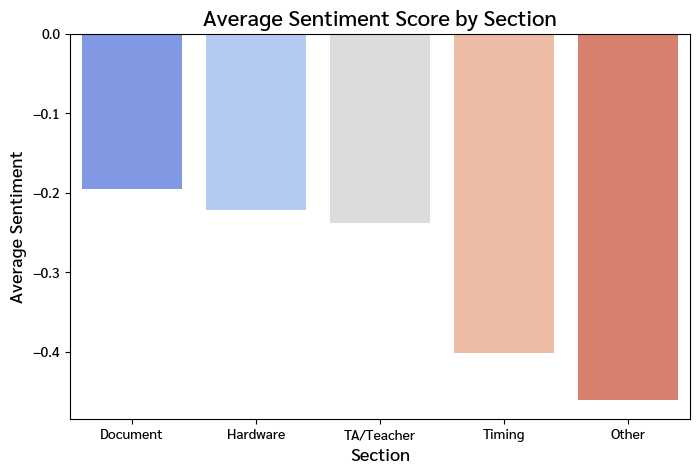

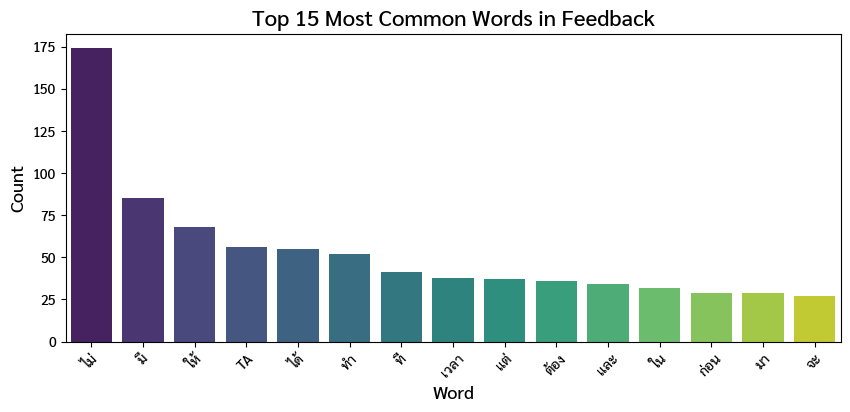


üìå Key Insights:
- ‚è±Ô∏è Timing ‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏î‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏û‡∏π‡∏î‡∏ñ‡∏∂‡∏á‡∏ö‡πà‡∏≠‡∏¢‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡πÅ‡∏•‡∏∞‡∏°‡∏±‡∏Å‡∏°‡∏µ sentiment ‡∏•‡∏ö
- üìÑ Document section ‡∏°‡∏µ sentiment ‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î (‡πÄ‡∏ä‡πà‡∏ô Doc ‡πÑ‡∏°‡πà‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î / ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏¢‡∏≤‡∏Å)
- üôã‚Äç‚ôÇÔ∏è TA/Teacher section ‡∏°‡∏µ‡∏ó‡∏±‡πâ‡∏á‡∏Ñ‡∏≥‡∏ä‡∏°‡πÅ‡∏•‡∏∞‡∏Ç‡πâ‡∏≠‡∏ö‡πà‡∏ô‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ô‡πâ‡∏≠‡∏¢
- üîå Hardware ‡∏™‡πà‡∏ß‡∏ô‡πÉ‡∏´‡∏ç‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏•‡∏≤‡∏á‡∏ñ‡∏∂‡∏á‡∏ö‡∏ß‡∏Å ‡πÅ‡∏ï‡πà‡∏ö‡πà‡∏ô‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏ô‡∏ö‡∏≤‡∏á‡∏Ñ‡∏≤‡∏ö


In [1]:
# =========================
# STEP 1: Import libraries
# =========================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
from wordcloud import WordCloud
from collections import Counter
from pythainlp.tokenize import word_tokenize
import matplotlib.font_manager as fm

# =========================
# STEP 2: Font setup (TH Sarabun New)
# =========================
font_path = os.path.join(os.getcwd(), "THSarabunNew.ttf")
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# =========================
# STEP 3: Load data from PostgreSQL
# =========================
load_dotenv()

DB_USER = os.getenv("POSTGRES_USER", "postgres")
DB_PASS = os.getenv("POSTGRES_PASSWORD", "postgres123")
DB_NAME = os.getenv("POSTGRES_DB", "feedbackdb")
DB_PORT = os.getenv("POSTGRES_PORT", "5433")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")

engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

df = pd.read_sql_query("SELECT section, category, comment FROM feedback;", engine)
print(f"‚úÖ Loaded {len(df)} rows")

# =========================
# STEP 4: Sentiment Analysis (Rule-based)
# =========================
positive_keywords = ["‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à", "‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°", "‡πÇ‡∏≠‡πÄ‡∏Ñ", "‡∏ä‡∏≠‡∏ö", "‡∏™‡∏∏‡∏î‡∏¢‡∏≠‡∏î", "‡∏Ç‡∏≠‡∏ö‡∏Ñ‡∏∏‡∏ì", "‡πÄ‡∏¢‡∏≠‡∏∞", "‡πÄ‡∏£‡πá‡∏ß", "‡∏ï‡∏£‡∏á‡πÄ‡∏ß‡∏•‡∏≤", "‡∏Ñ‡∏∏‡πâ‡∏°‡∏Ñ‡πà‡∏≤"]
negative_keywords = ["‡πÑ‡∏°‡πà‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à", "‡πÅ‡∏¢‡πà", "‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡πÑ‡∏°‡πà‡∏°‡∏µ", "‡∏•‡∏≥‡∏ö‡∏≤‡∏Å", "‡∏´‡∏á‡∏∏‡∏î‡∏´‡∏á‡∏¥‡∏î", "‡∏ô‡πâ‡∏≠‡∏¢", "‡∏ä‡πâ‡∏≤", "‡πÄ‡∏™‡∏µ‡∏¢‡πÄ‡∏ß‡∏•‡∏≤", "‡∏¢‡∏≤‡∏Å", "‡∏á‡∏á"]

def simple_sentiment(text):
    if not isinstance(text, str):
        return "neu"
    pos = sum(word in text for word in positive_keywords)
    neg = sum(word in text for word in negative_keywords)
    if pos > neg:
        return "pos"
    elif neg > pos:
        return "neg"
    return "neu"

df["sentiment"] = df["comment"].apply(simple_sentiment)
df["sentiment_score"] = df["sentiment"].map({"pos": 1, "neu": 0, "neg": -1})

# =========================
# STEP 5: Visualization 1 ‚Äì Sentiment Distribution by Section
# =========================
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="section", hue="sentiment", palette="coolwarm")
plt.title("Sentiment Distribution by Section", fontsize=16)
plt.xlabel("Section", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.show()

# =========================
# STEP 6: Word Cloud (Thai font)
# =========================
text = " ".join(df["comment"].dropna())
wc = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color="white"
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Feedback", fontsize=16)
plt.show()

# =========================
# STEP 7: Export to CSV (for Dashboard)
# =========================
os.makedirs("../data/processed", exist_ok=True)
out_path = "../data/processed/feedback_sentiment.csv"
df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"‚úÖ Exported sentiment data to {out_path}")

# =========================
# STEP 8: Summary ‚Äì Average Sentiment per Section
# =========================
summary = (
    df.groupby("section")["sentiment_score"]
    .mean()
    .reset_index()
    .sort_values("sentiment_score", ascending=False)
)
print("\nüìä Summary of average sentiment:")
print(summary)

plt.figure(figsize=(8,5))
sns.barplot(data=summary, x="section", y="sentiment_score", hue="section", palette="coolwarm", legend=False)
plt.title("Average Sentiment Score by Section", fontsize=16)
plt.xlabel("Section", fontsize=13)
plt.ylabel("Average Sentiment", fontsize=13)
plt.show()

# =========================
# STEP 9: Keyword Frequency
# =========================
all_words = []
for text in df["comment"].dropna():
    all_words.extend(word_tokenize(text, keep_whitespace=False))

common_words = Counter(all_words).most_common(15)
common_df = pd.DataFrame(common_words, columns=["Word", "Count"])

plt.figure(figsize=(10,4))
sns.barplot(data=common_df, x="Word", y="Count", hue="Word", palette="viridis", legend=False)
plt.title("Top 15 Most Common Words in Feedback", fontsize=16)
plt.xticks(rotation=45, fontproperties=fm.FontProperties(fname=font_path))
plt.xlabel("Word", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.show()

# =========================
# STEP 10: Insight Summary
# =========================
print("\nüìå Key Insights:")
print("- ‚è±Ô∏è Timing ‡πÄ‡∏õ‡πá‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏î‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏û‡∏π‡∏î‡∏ñ‡∏∂‡∏á‡∏ö‡πà‡∏≠‡∏¢‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡πÅ‡∏•‡∏∞‡∏°‡∏±‡∏Å‡∏°‡∏µ sentiment ‡∏•‡∏ö")
print("- üìÑ Document section ‡∏°‡∏µ sentiment ‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î (‡πÄ‡∏ä‡πà‡∏ô Doc ‡πÑ‡∏°‡πà‡∏•‡∏∞‡πÄ‡∏≠‡∏µ‡∏¢‡∏î / ‡πÄ‡∏Ç‡πâ‡∏≤‡πÉ‡∏à‡∏¢‡∏≤‡∏Å)")
print("- üôã‚Äç‚ôÇÔ∏è TA/Teacher section ‡∏°‡∏µ‡∏ó‡∏±‡πâ‡∏á‡∏Ñ‡∏≥‡∏ä‡∏°‡πÅ‡∏•‡∏∞‡∏Ç‡πâ‡∏≠‡∏ö‡πà‡∏ô‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ô‡πâ‡∏≠‡∏¢")
print("- üîå Hardware ‡∏™‡πà‡∏ß‡∏ô‡πÉ‡∏´‡∏ç‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏•‡∏≤‡∏á‡∏ñ‡∏∂‡∏á‡∏ö‡∏ß‡∏Å ‡πÅ‡∏ï‡πà‡∏ö‡πà‡∏ô‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏ô‡∏ö‡∏≤‡∏á‡∏Ñ‡∏≤‡∏ö")
